In [2]:
# Sample an N dimensional sphere and reduce it to 3d

In [3]:
# uncomment to make the 3d plot interactive
#%matplotlib notebook  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

In [34]:
samples_amt = 10000
dimensions = 5

In [35]:
def sample_hypersphere(N, D):
    np.random.seed(4)
        
    # Sample D vectors of N Gaussian coordinates
    samples = np.array([np.random.normal(0,1, D) for i in range(N)])
    
    # Normalise all distances (radii) to 1
    get_normal_radius =  lambda s: np.sqrt(np.sum(s**2))
    radii =  np.array([get_normal_radius(s) for s in samples])
    
    zipped = np.hstack((samples, radii.reshape(N,1)))
    normalise_point = lambda s: np.divide((s[0],s[1],s[2]), s[3])    
    samples = np.array([normalise_point(s) for s in zipped])
    
    # Sample N radii with exponential distribution
    new_radii = np.random.uniform(size=N)**(1/D)    
    samples = samples * new_radii.reshape((N,1))
        
    return samples

In [36]:
points = sample_hypersphere(samples_amt, dimensions)

In [40]:
reducer = umap.UMAP(n_neighbors=500, min_dist=0.1, n_components=3)
embedding = reducer.fit_transform(points)

In [41]:
xs = embedding[:, 0]
ys = embedding[:, 1]
zs = embedding[:, 2]

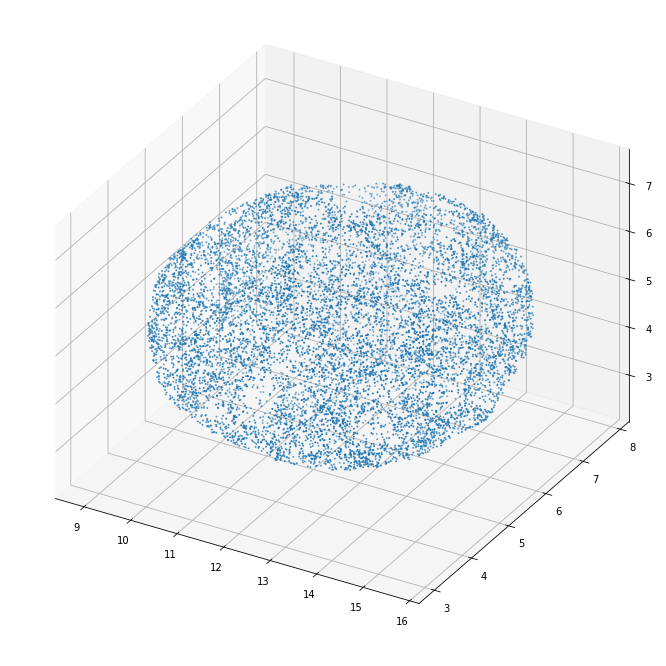

In [42]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')
ax.scatter(xs,ys,zs,s=1)
plt.show()